In [77]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA



boston = load_boston()

In [2]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df.describe()
# Certain fields such as CRIM evidently does have outliers with minimum value of zero to maximum values close to 88.
# ZN and chas has its min , q1 , mid value and q3 equal to 0 and only maximum value in 100 and 1 respectively. We can drop these columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- ZN       proportion of residential land zoned for lots over 25,000 sq.f
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) category variable

Both the variables seems to have its min , q1 , mid value and q3 equal to 0 and only maximum value in 100 and 1 respectively. We can drop these columns. 

In [7]:
#removing variables 'ZN' and 'CHAS' form data
df = df.drop(['ZN', 'CHAS'], axis=1)

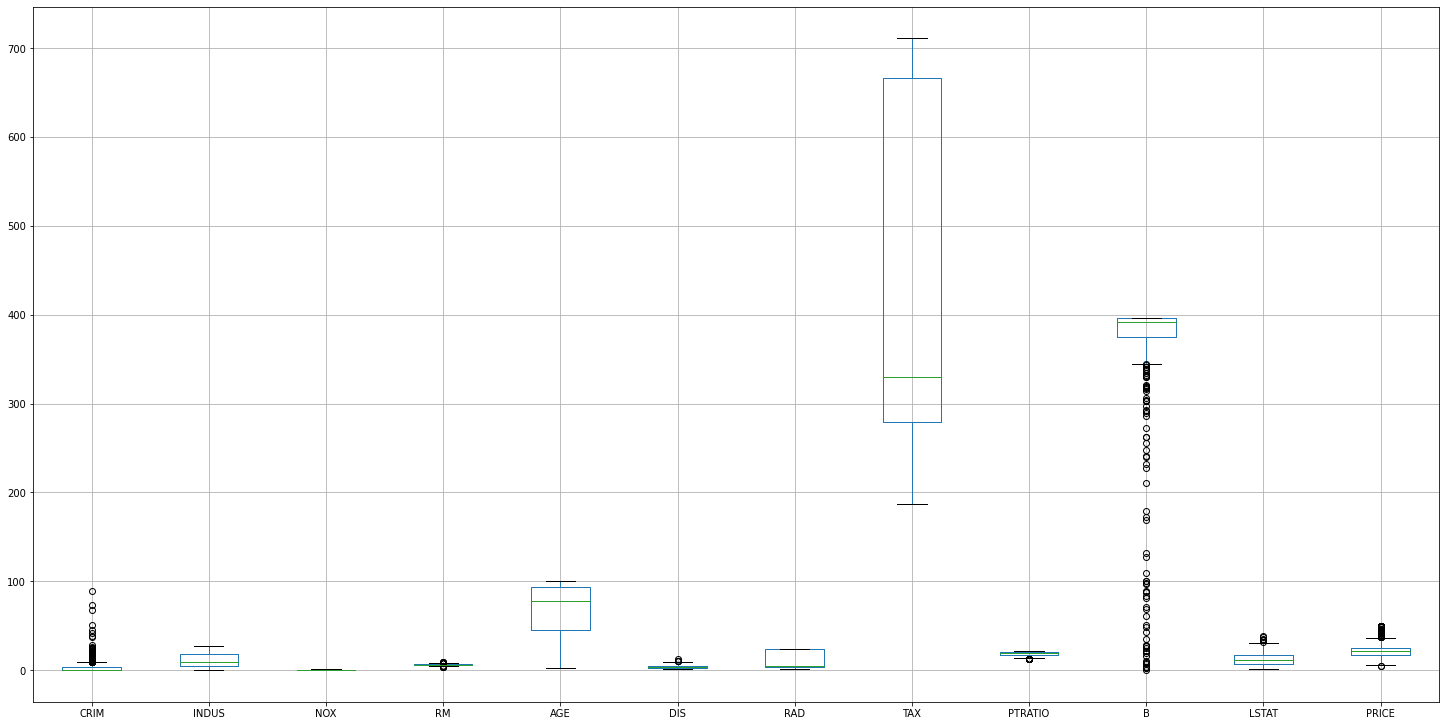

In [8]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.tight_layout(pad=0.4)
plt.show()

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [10]:
df_out=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
# rows that were deleted after outlier detection
change = np.round((len(df)-len(df_out))/len(df)*100,1)
print(f"Percentage of data lost after outlier detection {change} %")

Percentage of data lost after outlier detection 33.0 %


In [12]:
for i in df.columns:
  df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] 
  perc = (outlier_data.count()/df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in PRICE is 7.91% with count 40


In [13]:
df_out.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.903221,9.650855,0.520285,6.243336,61.828909,4.321821,6.672566,354.539823,18.471386,389.383717,11.290914,22.454867
std,1.871259,6.339184,0.100900,0.469004,27.822658,1.930645,6.448855,133.664579,1.832233,10.785053,5.542778,5.309888
min,0.006320,0.740000,0.389000,4.903000,2.900000,1.321600,1.000000,188.000000,14.700000,344.910000,1.980000,8.500000
25%,0.063400,5.130000,0.442900,5.925000,38.700000,2.716100,4.000000,276.500000,17.400000,387.955000,6.925000,19.250000
50%,0.141030,7.870000,0.504000,6.176000,65.200000,3.991700,5.000000,307.000000,18.600000,393.550000,10.190000,22.000000
75%,0.424045,13.360000,0.548500,6.539000,88.450000,5.705150,6.000000,398.000000,20.200000,396.900000,14.365000,24.700000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.400000


In [14]:
df_out

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


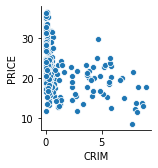

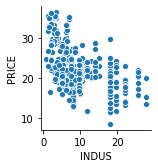

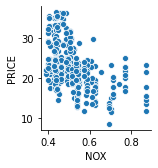

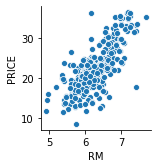

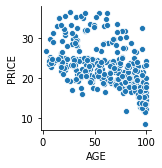

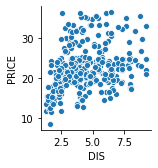

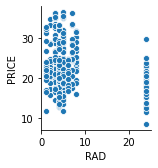

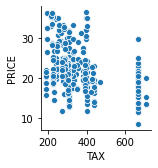

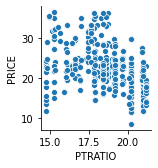

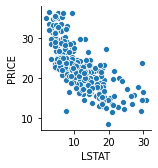

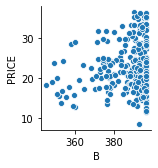

In [15]:

col = ['CRIM','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT','B']
for i in col:
    g = sns.pairplot(data= df_out , x_vars= i,y_vars=['PRICE'])


- CRIM     per capita crime rate by town & Price should be negatively coorelated. We can see that most of the price values are clustered around crime rate 0 and as crime rate increases we see lesser data points. 
 
- INDUS    proportion of non-retail business acres per town . Most of the data points and Highest prices tend to be between proportions less than 15. 
   
- NOX      nitric oxides concentration (parts per 10 million) , majority of the property prices seems to be clustered between 0.4 to 0.6.
- RM       average number of rooms per dwelling this seems to have a high positive coorelation to the property prices and we can indeed a linear relationship.
- AGE      proportion of owner-occupied units built prior to 1940 seems to have a negative coorelation. Between 30 to 85 we see the largest cluster of prices . Q1 value 38 and Q3 value 88.
- DIS      weighted distances to five Boston employment centres seems to be positively coorelated with pricing.
- RAD      index of accessibility to radial highways between 1 to 6 seems to have all the median dwelling prices , with the maximum value of 24 having a few points.
- TAX      full-value property-tax rate per $10,000 clustered mostly between 200 to less than 400, with one maximum value greater than 600 having a few points. Definitely Tax and RAD could be highly coorelated.
- PTRATIO  pupil-teacher ratio by town does seem to have majority on the dwellings on a ratio scale between 17.5 and 20 Althouigh each cluster does seem to have a fairly represented prices.
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town seems to have most of the median pricing between proportions of 380 and 390s, with very few house holds less than 360. 
- LSTAT    % lower status of the population seems to have a highly negative coorelation with price. a linear realtionship wiht negative trend.
        

In [16]:
X = df_out.iloc[:, :-1]
y = df_out.iloc[:, 11]

In [17]:
m = ols('PRICE ~ CRIM + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT+ B',df_out).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     98.58
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           8.40e-97
Time:                        11:35:40   Log-Likelihood:                -798.63
No. Observations:                 339   AIC:                             1621.
Df Residuals:                     327   BIC:                             1667.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1125      6.679      0.167      0.8

In [18]:
m1 = ols('PRICE ~ CRIM + INDUS + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT',df_out).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           9.57e-99
Time:                        11:35:40   Log-Likelihood:                -798.97
No. Observations:                 339   AIC:                             1618.
Df Residuals:                     329   BIC:                             1656.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3558      3.559      1.505      0.1

In [19]:
m2 = ols('PRICE ~ CRIM + RM + AGE + DIS + RAD + TAX + PTRATIO + LSTAT',df_out).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     135.4
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.06e-99
Time:                        11:35:40   Log-Likelihood:                -799.95
No. Observations:                 339   AIC:                             1618.
Df Residuals:                     330   BIC:                             1652.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1115      3.560      1.436      0.1

Exploring the relationships between price and all the other independent variables by OLS we can see that INDUS, NOX and B variables are not statistically significant to the Median prices with p values > 0.05. Hence we can drop them from our observations

In [20]:
df_out = df_out.drop(['NOX', 'INDUS','B'], axis = 1) 

In [21]:
df_out.corr()

,CRIM,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
CRIM,1.000000,-0.123846,0.388573,-0.407717,0.890917,0.799364,0.282047,0.343704,-0.346633
RM,-0.123846,1.000000,-0.274718,0.252900,-0.025397,-0.118886,-0.148265,-0.675936,0.742311
AGE,0.388573,-0.274718,1.000000,-0.667445,0.287966,0.361539,0.303311,0.633349,-0.523131
DIS,-0.407717,0.252900,-0.667445,1.000000,-0.317354,-0.397975,-0.308696,-0.458874,0.318233
RAD,0.890917,-0.025397,0.287966,-0.317354,1.000000,0.842878,0.318254,0.212634,-0.216278
TAX,0.799364,-0.118886,0.361539,-0.397975,0.842878,1.000000,0.318013,0.301407,-0.361071
PTRATIO,0.282047,-0.148265,0.303311,-0.308696,0.318254,0.318013,1.000000,0.185565,-0.376306
LSTAT,0.343704,-0.675936,0.633349,-0.458874,0.212634,0.301407,0.185565,1.000000,-0.706860
PRICE,-0.346633,0.742311,-0.523131,0.318233,-0.216278,-0.361071,-0.376306,-0.706860,1.000000


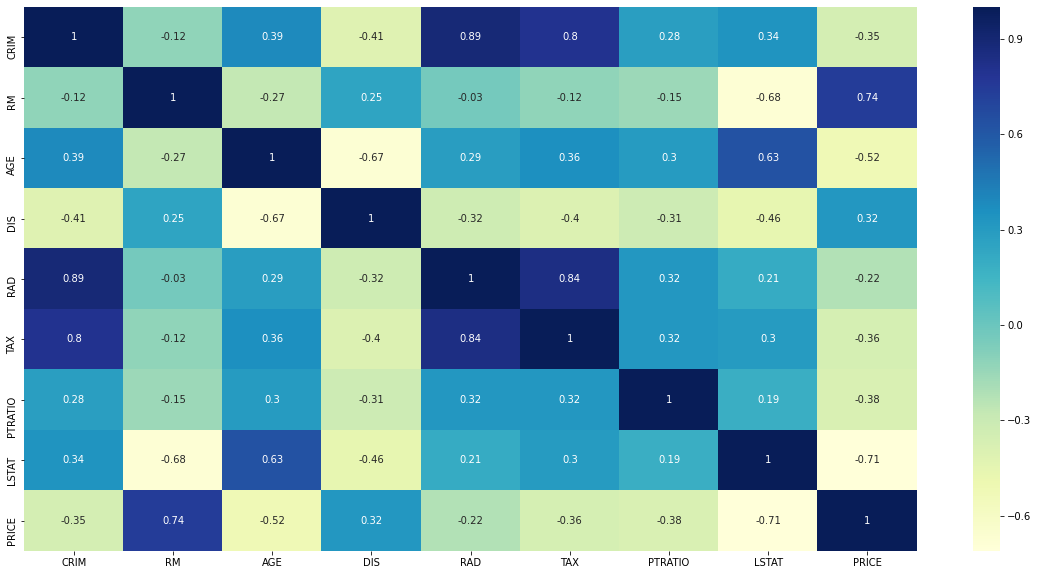

In [22]:
#
plt.figure(figsize=(20,10))
correlation_matrix = df_out.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

target = 'PRICE'
print(get_VIF(df_out,target))

const      637.087036
CRIM         5.797979
RM           2.069882
AGE          2.634495
DIS          1.964410
RAD          7.102423
TAX          3.826792
PTRATIO      1.224757
LSTAT        3.214577
dtype: float64


C:\Users\akars\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


VIF score of an independent variable represents how well the variable is explained by other independent variables.Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

Also as previously noted TAX and RAD were highly coorelated and removing RAD from the equation reduced the influence of Tax .

In [24]:
df_out = df_out.drop(['CRIM', 'RAD'], axis = 1) 

In [25]:
print(get_VIF(df_out,target))

const      598.789846
RM           2.035689
AGE          2.626899
DIS          1.936147
TAX          1.292486
PTRATIO      1.195037
LSTAT        3.143844
dtype: float64


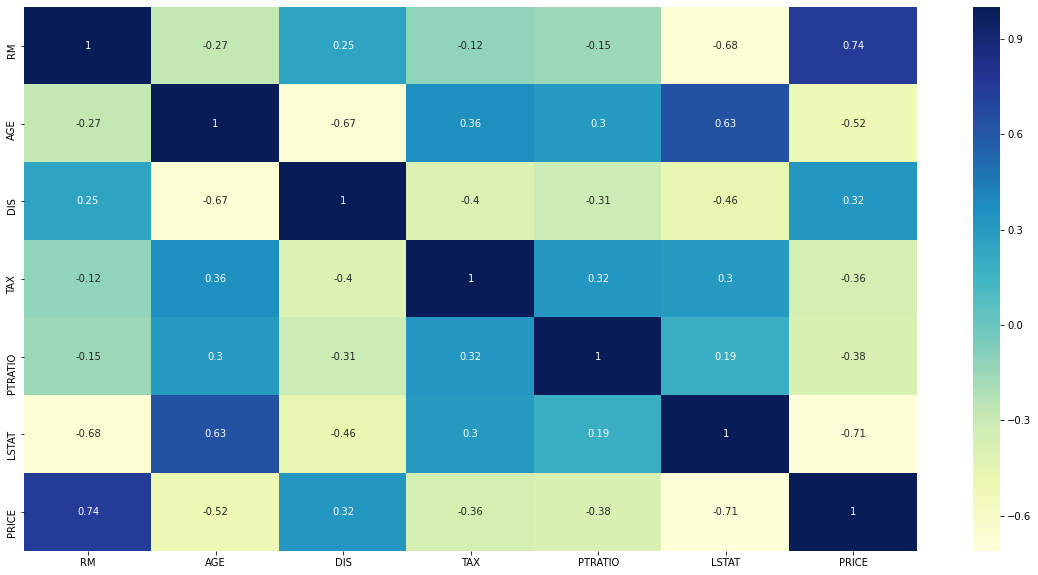

In [26]:
plt.figure(figsize=(20,10))
correlation_matrix = df_out.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

Age and DIS are highly coorelated with LSTAT and each other, and LSTAT is highly coorelated with Price and hence we drop Age and DIS. 

In [27]:
df_out = df_out.drop(['AGE','DIS'], axis = 1) 

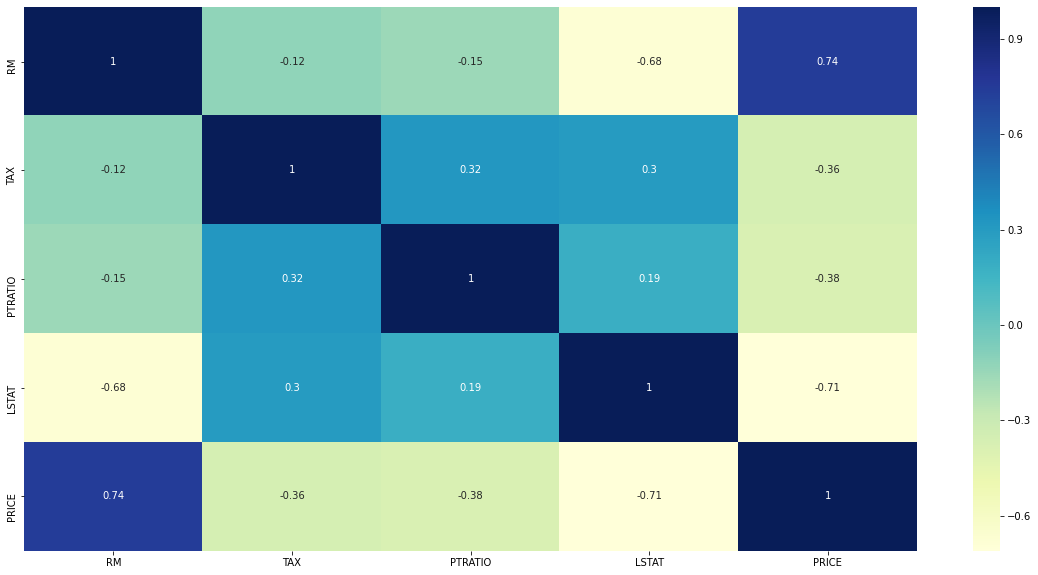

In [28]:
plt.figure(figsize=(20,10))
correlation_matrix = df_out.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

Tax has little to less coorelation to any variables , dependent or indenpendent and hence we can drop them as well.

In [29]:
df_out = df_out.drop(['TAX'], axis = 1) 

In [30]:
m3 = ols('PRICE ~ RM  + PTRATIO + LSTAT',df_out).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     243.1
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           9.82e-84
Time:                        11:35:42   Log-Likelihood:                -850.56
No. Observations:                 339   AIC:                             1709.
Df Residuals:                     335   BIC:                             1724.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4085      3.686      1.467      0.1

In [118]:
y = df_out['PRICE']
X= df_out.drop(['PRICE'], axis = 1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [120]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_predict = lm.predict(X_test)
r2_score(y_test,y_predict)

0.5459154964945855

In [121]:
lm.score(X_train,y_train)

0.7043540508353515

In [122]:
lm.score(X_test,y_test)

0.5459154964945855

More than 50 percent of LSTAT, RM and PRATIO is able to define the price predictions for boston dataset.

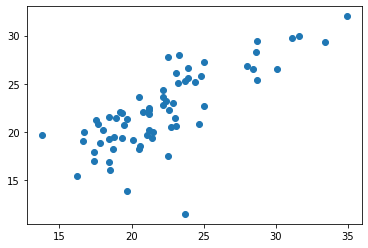

In [36]:
plt.scatter(y_test,y_predict)

Center: $22212.015009      Spread (standard deviation): $4078.094489


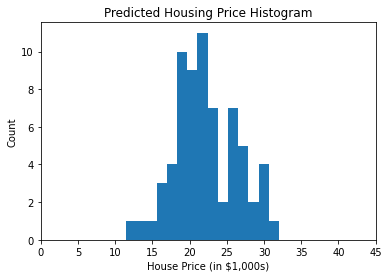

In [37]:
plt.hist(y_predict, bins=15)
plt.xlabel("House Price (in $1,000s)")
plt.ylabel("Count")
plt.xticks([x for x in range(0,50,5)])
plt.title("Predicted Housing Price Histogram")
print("Center: $%f      Spread (standard deviation): $%f" % (np.mean(y_predict)*1000, np.std(y_predict)*1000))

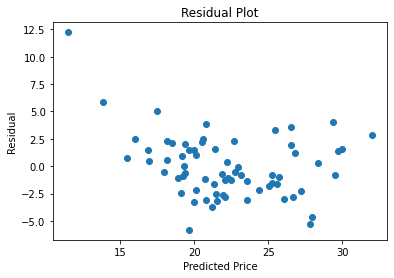

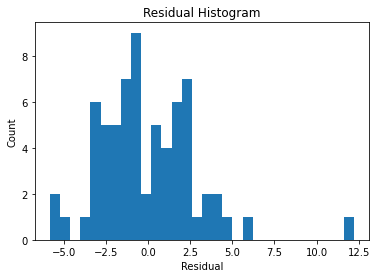

In [38]:
plt.scatter(y_predict, y_test - y_predict)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

plt.hist(y_test - y_predict,bins = 30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")
plt.show()


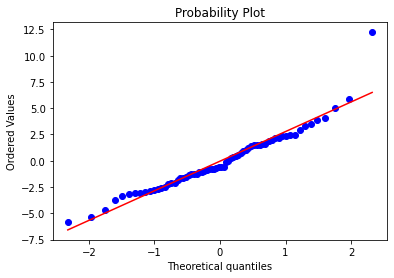

In [39]:
import scipy.stats as stats
stats.probplot(y_test - y_predict, fit=True, plot=plt)
plt.show()

most of the residuals fit the probabilty plot line which suggests our model is good

In [40]:
train_sizes  = [1,10,50,100,271,237]

In [41]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(estimator = lm,X = X,y = y, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error',shuffle=True)

In [42]:
train_scores

array([[ -0.        ,  -0.        ,  -0.        ,  -0.        ,
         -0.        ],
       [-10.2657881 ,  -5.56892625,  -3.54881615,  -6.71469198,
         -4.34775656],
       [ -7.88330814,  -7.80984229,  -4.37701414,  -7.98072051,
         -8.70195157],
       [ -7.82198812, -10.80280901,  -7.2911778 ,  -6.98610961,
         -8.65184208],
       [ -9.77954066, -10.3470068 ,  -7.73324706,  -8.63182042,
         -7.98891123],
       [ -9.20842687, -10.09424117,  -7.41726878,  -9.24070708,
         -7.64786487]])

In [43]:
validation_scores

array([[ -33.96029412, -157.24367647,  -81.57764706, -147.98132353,
         -38.06925373],
       [ -47.60441434,  -38.98022272,  -18.03456196,   -9.41233835,
         -20.33842321],
       [ -11.93914132,   -4.70019182,  -15.1624605 ,   -6.65494257,
         -15.50317244],
       [  -9.20817088,   -4.67018118,  -15.20376285,   -6.61388387,
         -15.38293041],
       [  -7.8456206 ,   -3.93762092,  -15.51411342,   -7.73032463,
         -15.47394065],
       [  -7.67587502,   -3.95804841,  -15.47121691,   -8.00001503,
         -15.5591025 ]])

In [44]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) 
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
10     6.089196
50     7.350567
100    8.310785
237    8.896105
271    8.721702
dtype: float64

 --------------------

Mean validation scores

 1      91.766439
10     26.873992
50     10.791982
100    10.215786
237    10.100324
271    10.132852
dtype: float64


(0.0, 20.0)

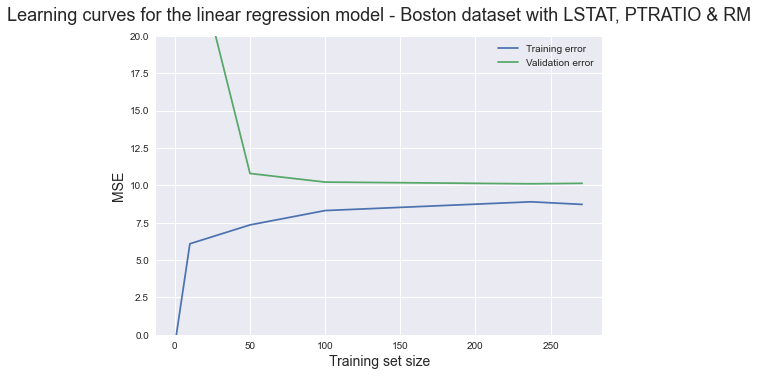

In [45]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the linear regression model - Boston dataset with LSTAT, PTRATIO & RM', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,20)

Low variance but high biased ; underfit model. 

We sould either increase the features for complexity or try an algorithm with less regularization.

Next trying feature selection using f_regression


In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [47]:
df1 = pd.DataFrame(boston.data)
df1.columns = boston.feature_names
df1['PRICE'] = boston.target
X1 = df1.drop('PRICE', axis = 1)
y1 = df1['PRICE']

In [48]:
X_trainfs, X_testfs, y_trainfs, y_testfs = train_test_split(X1,y1, test_size=0.20, random_state=0)
# feature selection
f_selector = SelectKBest(score_func=f_regression, k= 5)
# learn relationship from training data
f_selector.fit(X_trainfs, y_trainfs)
# transform train input data
X_train_fs = f_selector.transform(X_trainfs)
# transform test input data
X_test_fs = f_selector.transform(X_testfs)

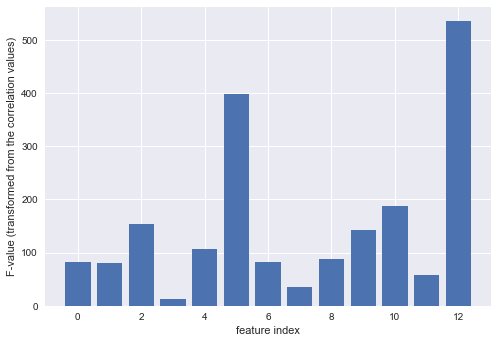

In [49]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [50]:
conda install -c conda-forge eli5

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
import eli5
feat_names = eli5.transform_feature_names(f_selector, list(X1.columns))

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\akars\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [52]:
feat_names

['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']

In [53]:
df_selected = df1[feat_names]
df_selected['PRICE'] = y1

C:\Users\akars\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
print(get_VIF(df_selected,target))

const      292.821001
INDUS        2.417501
RM           1.693412
TAX          2.378375
PTRATIO      1.362684
LSTAT        2.250379
dtype: float64


C:\Users\akars\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
df_selected.describe()

,INDUS,RM,TAX,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,6.284634,408.237154,18.455534,12.653063,22.532806
std,6.860353,0.702617,168.537116,2.164946,7.141062,9.197104
min,0.460000,3.561000,187.000000,12.600000,1.730000,5.000000
25%,5.190000,5.885500,279.000000,17.400000,6.950000,17.025000
50%,9.690000,6.208500,330.000000,19.050000,11.360000,21.200000
75%,18.100000,6.623500,666.000000,20.200000,16.955000,25.000000
max,27.740000,8.780000,711.000000,22.000000,37.970000,50.000000


In [56]:
for i in df_selected.columns:
  df_selected.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = df_selected[i][(df_selected[i] < lower_bound) | (df_selected[i] > upper_bound)] 
  perc = (outlier_data.count()/df_selected[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in INDUS is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in LSTAT is 1.38% with count 7
Outliers in PRICE is 7.91% with count 40


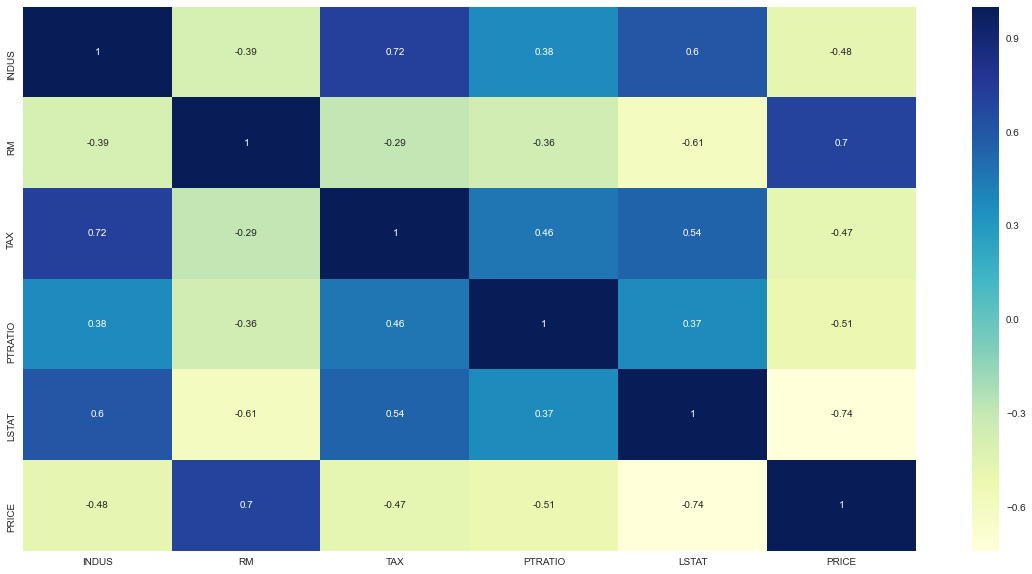

In [57]:
plt.figure(figsize=(20,10))
correlation_matrix = df_selected.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

INDUS and Tax are highly coorelated to each other as well as affecting other variables like LSTAT. lets drop them 

In [58]:
df_selected = df_selected.drop(['TAX','INDUS'], axis = 1) 

In [59]:
X_selected = df_selected.drop(['PRICE'], axis = 1) 

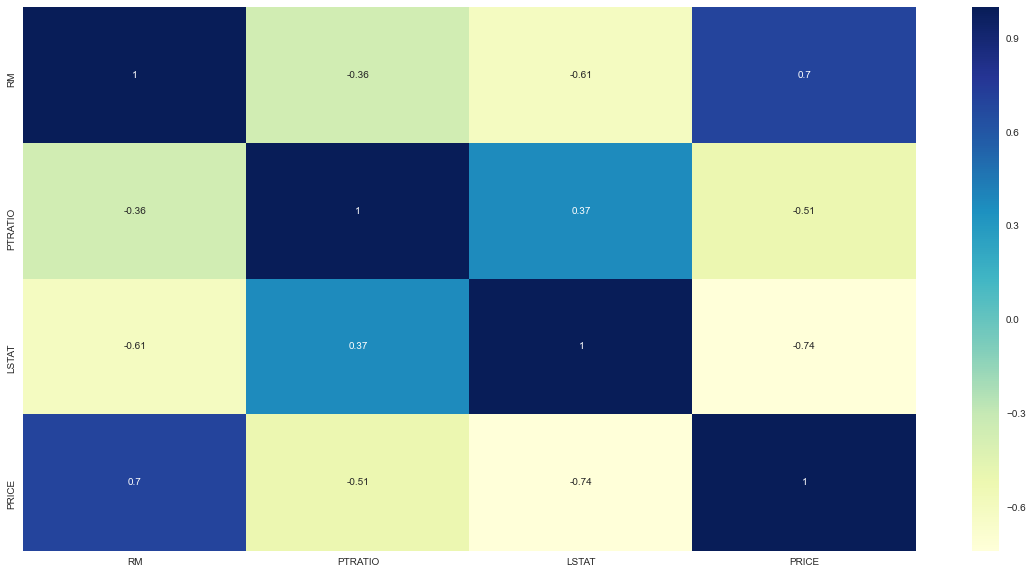

In [60]:
plt.figure(figsize=(20,10))
correlation_matrix = df_selected.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size = 0.2, random_state = 42)
lm.fit(X_train,y_train)
y_predict = lm.predict(X_test)
r2_score(y_test,y_predict)

0.6302528487272829

In [62]:
print (f"Training set score : {lm.score(X_train,y_train)} ; Test set score : {lm.score(X_test,y_test)}")

Training set score : 0.6864566575056517 ; Test set score : 0.6302528487272829


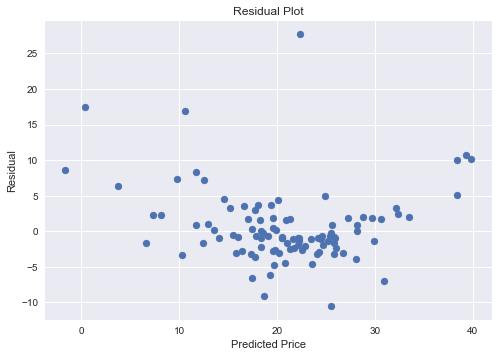

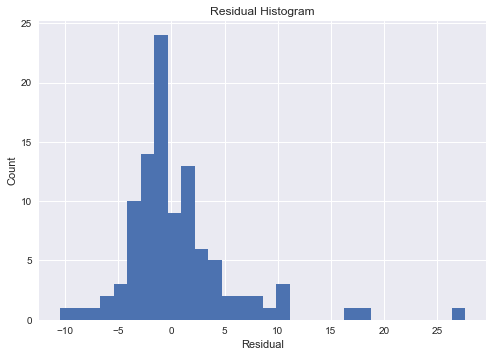

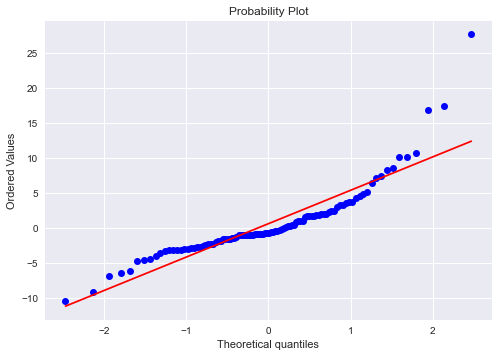

Mean training scores

 1      -0.000000
10      5.264157
50     16.323326
100    21.340856
354    25.985803
404    26.468541
dtype: float64

 --------------------

Mean validation scores

 1      185.358043
10      60.403414
50      40.446771
100     35.927894
354     34.062477
404     34.036746
dtype: float64


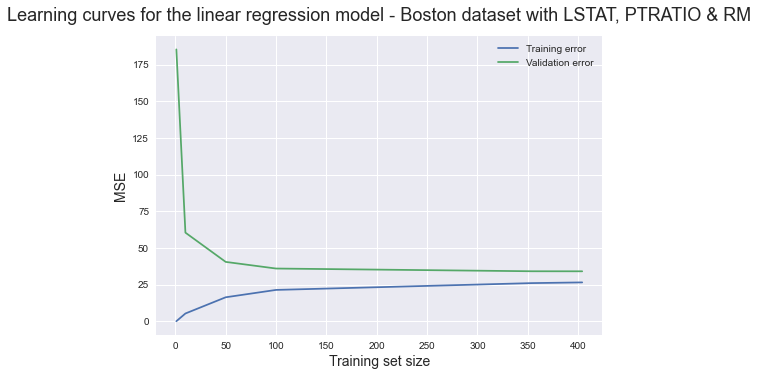

In [65]:
plt.scatter(y_predict, y_test - y_predict)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()

plt.hist(y_test - y_predict,bins = 30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")
plt.show()

stats.probplot(y_test - y_predict, fit=True, plot=plt)
plt.show()

train_sizes  = [1,10,50,100,354,404]
train_sizes, train_scores, validation_scores = learning_curve(estimator = lm,X = X_selected,y = y1, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error',shuffle=True)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) 
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for the linear regression model - Boston dataset with LSTAT, PTRATIO & RM', fontsize = 18, y = 1.03)
plt.legend()

plt.show()


Althought the r square metric seems to have increased for this model ; the residual plots are a lesser fit . Must be because we did not eliminate outliers for the model. Learning curve as well is exhibiting higher MSE values showing increase in error. 

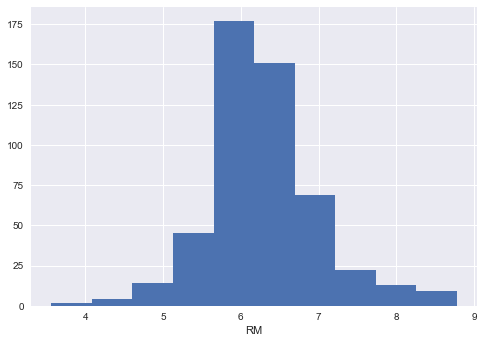

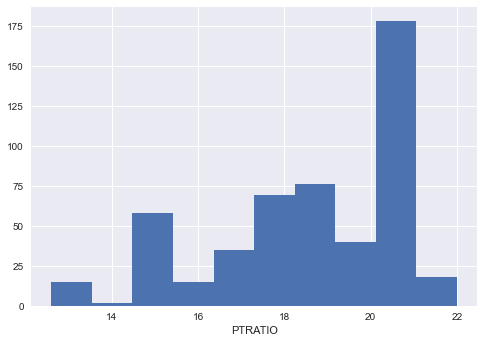

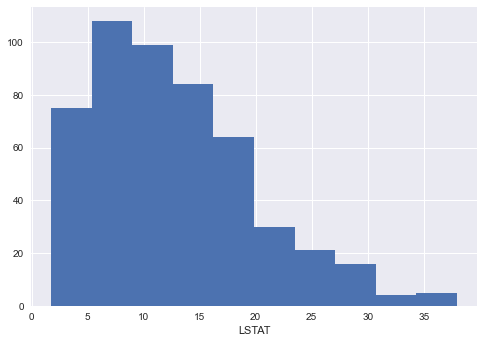

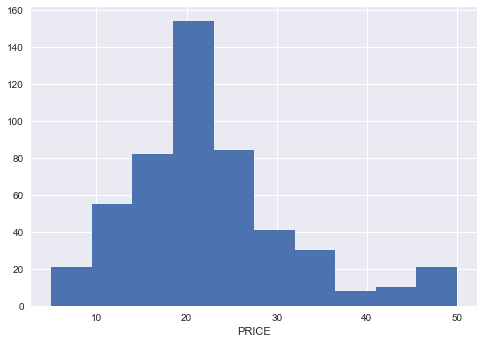

In [66]:
for i in df_selected.columns:
    plt.hist(df_selected[i])
    plt.xlabel(i)
    plt.show()

In [67]:
from scipy.stats import shapiro
alpha = 0.05
for i in df_selected.columns:
    stat, p = shapiro(df_selected[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    if p > alpha:
        print(f'{i} looks Gaussian (fail to reject H0)')
    else:
        print(f'{i} does not look Gaussian (reject H0)')

Statistics=0.961, p=0.000
RM does not look Gaussian (reject H0)
Statistics=0.904, p=0.000
PTRATIO does not look Gaussian (reject H0)
Statistics=0.937, p=0.000
LSTAT does not look Gaussian (reject H0)
Statistics=0.917, p=0.000
PRICE does not look Gaussian (reject H0)


In [68]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

wrapped_model = TransformedTargetRegressor(regressor= lm , transformer= scaler)

wrapped_model.fit(X_train_scaled, y_train)
y_pred = wrapped_model.predict(X_test_scaled)

In [69]:
r2_test_lm = r2_score(y_test,y_pred)
mse_lm = mean_squared_error(y_test,y_pred)
r2_train_lm = wrapped_model.score(X_train_scaled,y_train)
print  ( F"R square : {r2_score(y_test,y_pred)} , MSE : {mean_squared_error(y_test,y_pred)}")
print (f"Training set score : {wrapped_model.score(X_train_scaled,y_train)} ; Test set score : {wrapped_model.score(X_test_scaled,y_test)}")

R square : 0.6302528487272829 , MSE : 27.114957415580566
Training set score : 0.6864566575056518 ; Test set score : 0.6302528487272829


# Support Vector Regression (SVR)


Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. 


Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary. Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

Y = wx+b (equation of hyperplane)
Then the equations of decision boundary become:

wx+b= +a

wx+b= -a
Thus, any hyperplane that satisfies our SVR should satisfy:

-a < Y- wx+b < +a 
Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.

In [70]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', gamma = 'scale')
wrapped_model = TransformedTargetRegressor(regressor= svr , transformer= scaler)

wrapped_model.fit(X_train_scaled, y_train)
y_pred_svr = wrapped_model.predict(X_test_scaled)
r2_test_svr = r2_score(y_test,y_pred_svr)
mse_svr = mean_squared_error(y_test,y_pred_svr)
r2_train_svr = wrapped_model.score(X_train_scaled,y_train)

In [71]:
print  ( F"R square : {r2_score(y_test,y_pred_svr)} , MSE : {mean_squared_error(y_test,y_pred_svr)}")
print (f"Training set score : {wrapped_model.score(X_train_scaled,y_train)} ; Test set score : {wrapped_model.score(X_test_scaled,y_test)}")

R square : 0.7904020209947673 , MSE : 15.370612743211662
Training set score : 0.8341995458063206 ; Test set score : 0.7904020209947673


# Decision tree regression

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use standard deviation to calculate the homogeneity of a numerical sample. If the numerical sample is completely homogeneous its standard deviation is zero.



In [86]:

dt = DecisionTreeRegressor(max_depth=3, random_state=1234)
wrapped_model = TransformedTargetRegressor(regressor= dt , transformer= scaler)

wrapped_model.fit(X_train_scaled, y_train)
y_pred_dt = wrapped_model.predict(X_test_scaled)

r2_test_dt = r2_score(y_test,y_pred_dt)
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_train_dt = wrapped_model.score(X_train_scaled,y_train)

In [87]:
print  ( F"R square : {r2_score(y_test,y_pred_dt)} , MSE : {mean_squared_error(y_test,y_pred_dt)}")
print (f"Training set score : {wrapped_model.score(X_train_scaled,y_train)} ; Test set score : {wrapped_model.score(X_test_scaled,y_test)}")

R square : 0.6679219352208099 , MSE : 24.352540794816804
Training set score : 0.7983681584636689 ; Test set score : 0.6679219352208099


|--- feature_0 <= 6.94
|   |--- feature_2 <= 14.40
|   |   |--- feature_2 <= 5.72
|   |   |   |--- value: [29.73]
|   |   |--- feature_2 >  5.72
|   |   |   |--- value: [22.34]
|   |--- feature_2 >  14.40
|   |   |--- feature_2 <= 19.83
|   |   |   |--- value: [16.99]
|   |   |--- feature_2 >  19.83
|   |   |   |--- value: [12.17]
|--- feature_0 >  6.94
|   |--- feature_0 <= 7.44
|   |   |--- feature_2 <= 15.76
|   |   |   |--- value: [33.30]
|   |   |--- feature_2 >  15.76
|   |   |   |--- value: [14.10]
|   |--- feature_0 >  7.44
|   |   |--- feature_1 <= 19.65
|   |   |   |--- value: [45.56]
|   |   |--- feature_1 >  19.65
|   |   |   |--- value: [21.90]

----------------------


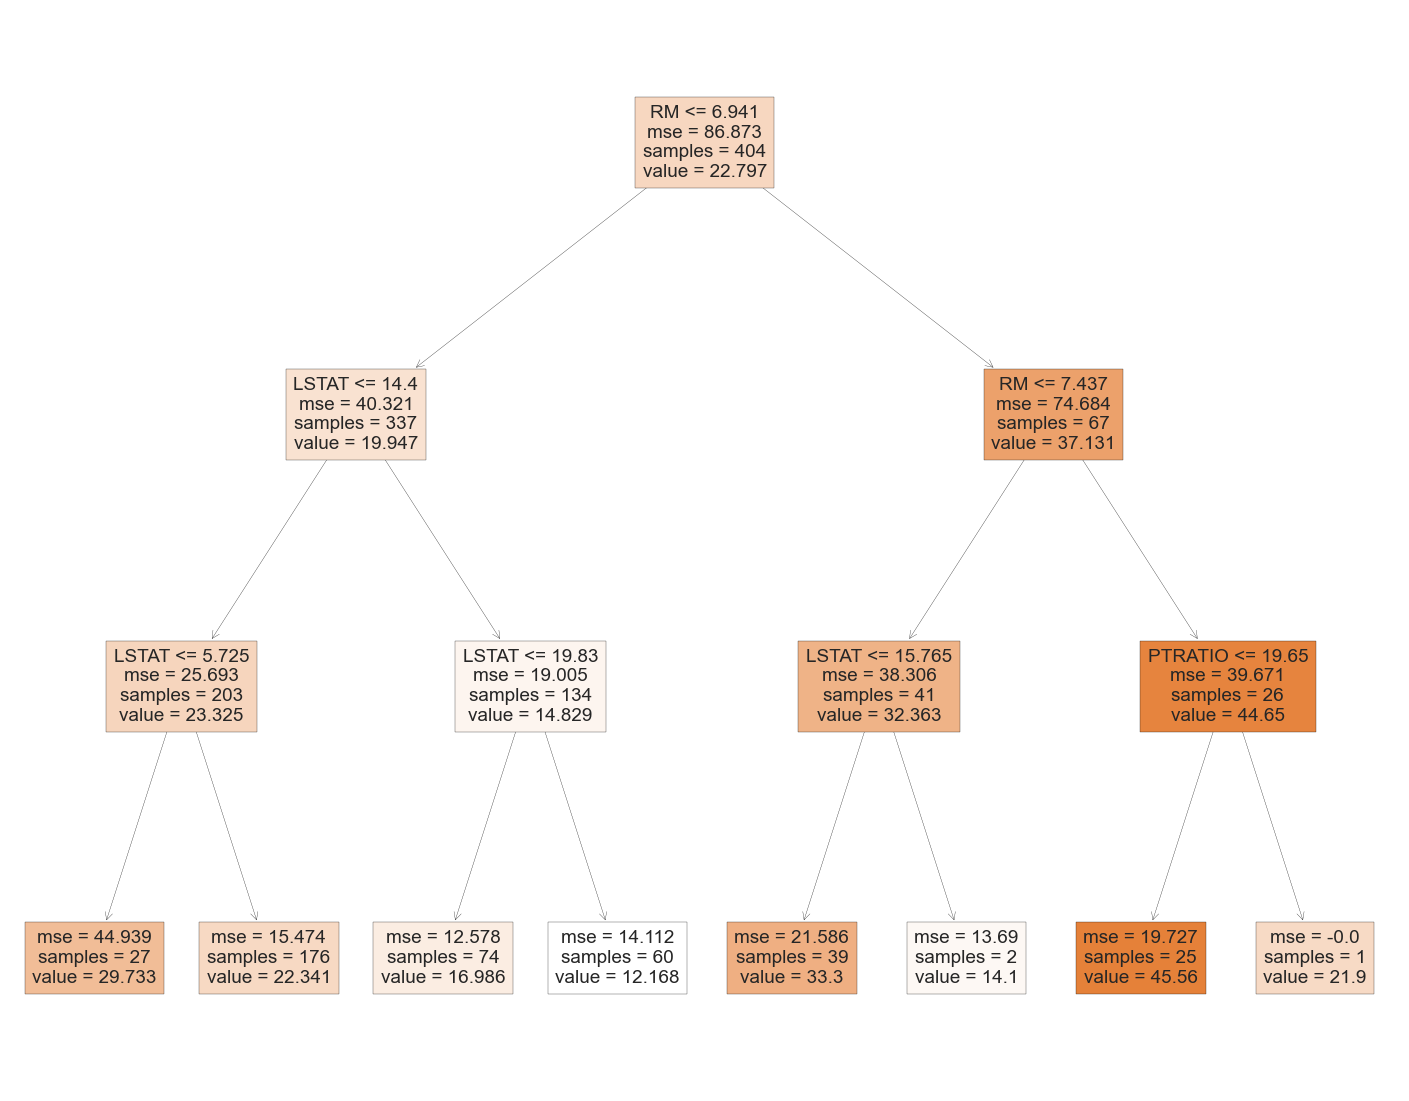

In [98]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, y_train)
y_preddt = regr.predict(X_test)
text_representation = tree.export_text(regr)
print(text_representation)
print("----------------------")
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=X.columns, filled=True)

# Random forest classifier

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

R square : 0.7417227602319711 , MSE : 18.940447096395374
Training set score : 0.7765297275236074 ; Test set score : 0.7417227602319711


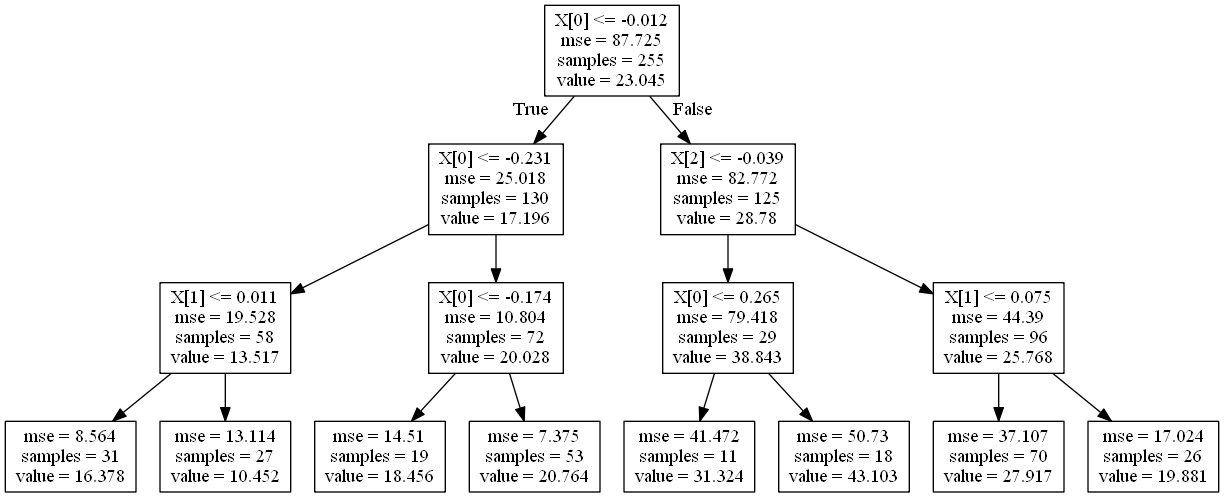

In [111]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os


rf = RandomForestRegressor(n_estimators = 500,bootstrap = True, max_depth=3,min_samples_leaf=3,min_samples_split=5)
pipe = Pipeline([('scaler', scaler),('reduce_dim', PCA()),('regressor', rf)])
pipe.fit(X_train,y_train)
ypipe=pipe.predict(X_test)
r2_test_rf = r2_score(y_test,ypipe)
mse_rf = mean_squared_error(y_test,ypipe)
r2_train_rf = pipe.score(X_train,y_train)

print  ( F"R square : {r2_test_rf} , MSE : {mse_rf}")
print (f"Training set score : {pipe.score(X_train,y_train)} ; Test set score : {pipe.score(X_test,y_test)}")

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(pipe.named_steps['regressor'].estimators_[0], out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())




In [113]:
models = [('Linear Regression', r2_train_lm, r2_test_lm,mse_lm),
          ('Support Vector Regression', r2_train_svr, r2_test_svr,mse_svr),
          ('Decision Tree Regression', r2_train_dt, r2_test_dt,mse_dt),
          ('Random Forest Regression', r2_train_rf, r2_test_rf,mse_rf)]

In [114]:
model_predictions = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)', 'MSE'])
model_predictions

,Model,R2_Score(training),R2_Score(test),MSE
0,Linear Regression,0.686457,0.630253,27.114957
1,Support Vector Regression,0.834200,0.790402,15.370613
2,Decision Tree Regression,0.798368,0.667922,24.352541
3,Random Forest Regression,0.776530,0.741723,18.940447


Overall Support vector Model has the variables LSTAT, PTRATIO and RM reflecting 79 percent of the variance in the dataset with the least MSE of 15.3 

Mean training scores

 1      -0.000000
10     11.820126
50     23.706716
100    25.098835
354    25.617150
404    26.422227
dtype: float64

 --------------------

Mean validation scores

 1      115.500026
10      36.800387
50      35.825746
100     30.060926
354     34.386602
404     34.303020
dtype: float64


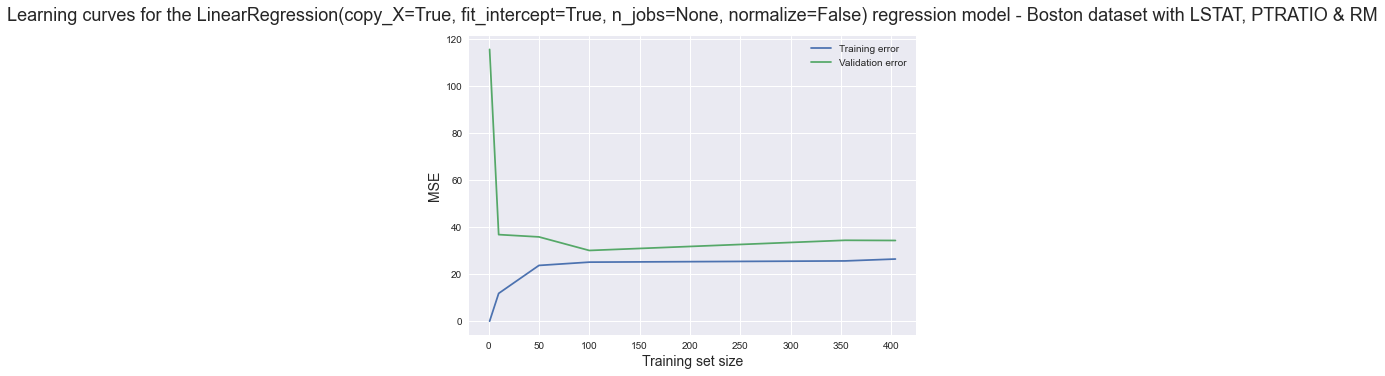

Mean training scores

 1      8.084247e-27
10     1.818073e+01
50     1.405138e+01
100    1.400884e+01
354    1.464985e+01
404    1.409647e+01
dtype: float64

 --------------------

Mean validation scores

 1      256.390717
10      59.113997
50      25.013347
100     24.886824
354     23.838904
404     24.896200
dtype: float64


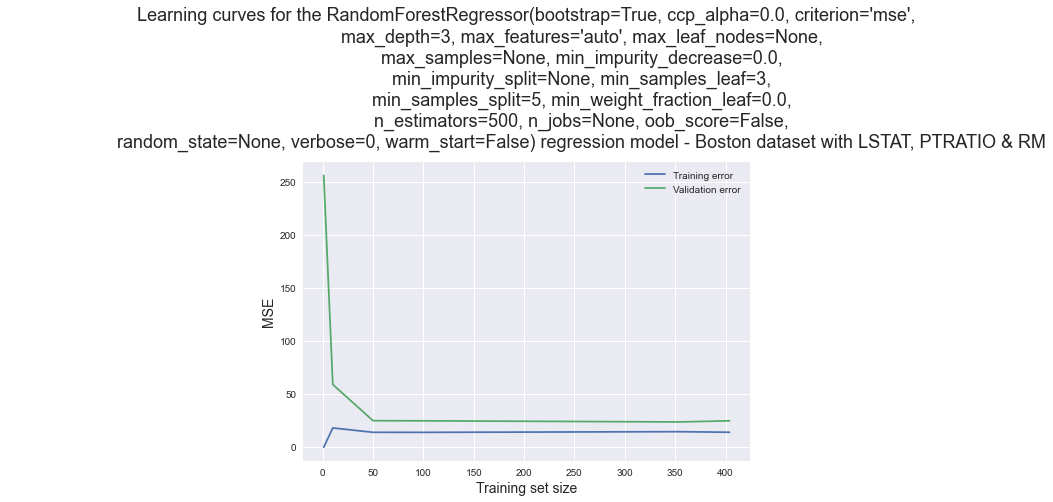

Mean training scores

 1      -0.000000
10     99.011016
50     58.327469
100    41.721223
354    30.391524
404    30.223143
dtype: float64

 --------------------

Mean validation scores

 1      304.100204
10      76.943396
50      50.719406
100     47.879674
354     37.847037
404     36.000593
dtype: float64


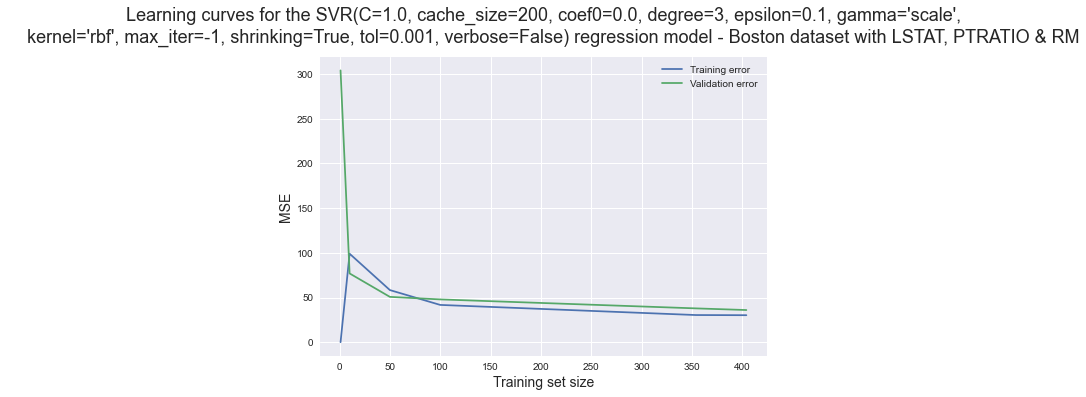

Mean training scores

 1      -0.000000
10      0.455540
50      8.528735
100    10.968660
354    16.303723
404    16.690793
dtype: float64

 --------------------

Mean validation scores

 1      95.084573
10     51.502113
50     33.431646
100    30.038687
354    32.217572
404    31.119564
dtype: float64


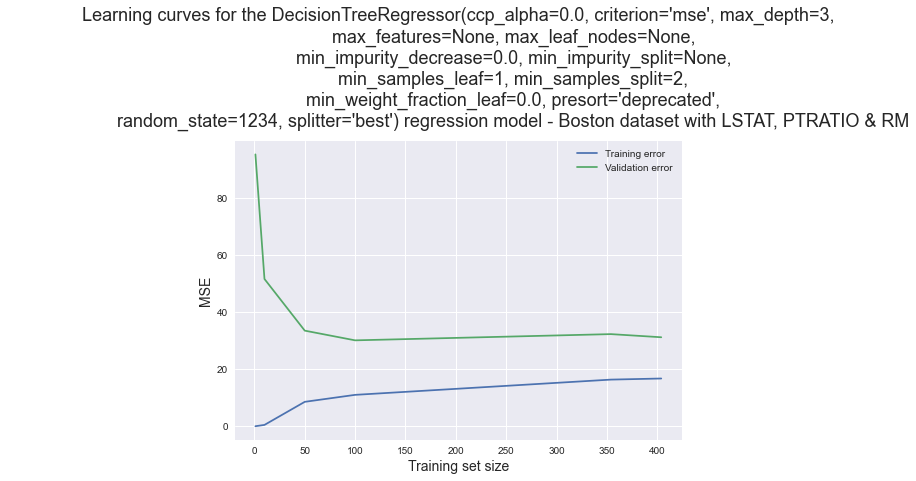

In [115]:
train_sizes  = [1,10,50,100,354,404]
model = [lm,rf,svr,dt]
for i in model:
    train_sizes, train_scores, validation_scores = learning_curve(estimator = i,X = X_selected,y = y1, train_sizes = train_sizes, cv = 5,scoring = 'neg_mean_squared_error',shuffle=True)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) 
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(f'Learning curves for the {i} regression model - Boston dataset with LSTAT, PTRATIO & RM', fontsize = 18, y = 1.03)
    plt.legend()

    plt.show()